In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data In

In [125]:
# loading in CAHOOTS data from 2021 and 2022
call_data_21_22 = pd.read_csv("call_data_from_CAHOOTS_2021_2022.csv")
#no_na_call_data_21_22 = call_data_21_22.dropna()
no_na_call_data_21_22

,Date,TimeOfCall,Age,Gender,Race,Language,City,Reason for Dispatch
0,12/7/22,1:28:00,16,Male,Chose not to Disclose,English,Eugene,Counseling
1,11/10/22,13:12:00,55,Male,White,English,Eugene,Police Assist
2,1/20/21,17:25:01,53,Male,White,English,Eugene,Public Assist
3,1/20/21,21:34:01,32,Female,White,English,Eugene,Public Assist
4,1/20/21,22:10:30,50,Male,Black or African American,English,Eugene,Public Assist
...,...,...,...,...,...,...,...,...
46895,12/10/22,12:37:34,Unavailable,Female,Chose not to Disclose,English,Springfield,Check Welfare
46896,12/10/22,13:04:57,27,Female,White,English,Springfield,Transport
46897,12/10/22,13:55:49,89,Female,White,English,Springfield,Check Welfare
46898,12/10/22,15:06:45,41,Female,White,English,Springfield,Transport


In [127]:
# loading in CAHOOTS data from 2023
call_data_2023 = pd.read_csv("call_data_from_CAHOOTS.csv")
call_data_2023

,Date,TimeOfCall,Age,Gender,Race,Language,City,Reason for Dispatch
0,1/1/23,0:05:33,57,Female,White,English,Eugene,Public Assist
1,1/1/23,0:05:00,Not Given,Male,NaN,English,Eugene,Check Welfare
2,1/1/23,1:09:51,Not Given,Female,NaN,English,Eugene,Information Not Available
3,1/1/23,1:33:15,Not Given,Female,NaN,English,Eugene,Public Assist
4,1/1/23,1:45:30,67,Female,White,English,Eugene,Public Assist
...,...,...,...,...,...,...,...,...
19565,12/31/23,9:33:35 PM,Not Given,Chose not to disclose,White,English,Springfield,Information Not Available
19566,12/31/23,9:51:35 PM,Not Given,Chose not to disclose,NaN,English,Informatio not recorded,Information Not Available
19567,12/31/23,9:58:10 PM,17,Chose not to disclose,White,English,Eugene,Information Not Available
19568,12/31/23,10:15:00 PM,17,Chose not to disclose,White,English,Eugene,Information Not Available


# Merging 2021, 2022, and 2023 Data

In [129]:
# merging the CAHOOTS 2021, 2022, and 2023 data
CAHOOTS_call_data = call_data_21_22.merge(call_data_2023, how="outer")
CAHOOTS_call_data

,Date,TimeOfCall,Age,Gender,Race,Language,City,Reason for Dispatch
0,1/1/22,0:11:00,46,Male,White,English,Eugene,Public Assist
1,1/1/22,0:26:16,55,Male,White,English,Eugene,Public Assist
2,1/1/22,10:10:33,Unavailable,Male,Chose not to Disclose,English,Eugene,Public Assist
3,1/1/22,10:30:02,81,Female,White,English,Eugene,Transport
4,1/1/22,11:08:33,51,Male,White,English,Eugene,Check Welfare
...,...,...,...,...,...,...,...,...
67516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploring Where There are NA values/if there are any patterns

In [131]:
# Assuming CAHOOTS_age_all is your DataFrame and it's properly loaded

cahoots_age_rfd_nas = CAHOOTS_call_data.drop(["TimeOfCall","Gender", "Race", "Language","City", "Date"], axis=1)

# Replace 'Unavailable' and 'Not Given' with 'NA'
cahoots_age_rfd_nas['Age'].fillna("NA", inplace=True)
cahoots_age_rfd_nas['Age'].replace("Not Given", "NA", inplace=True)
cahoots_age_rfd_nas['Age'].replace("Unavailable", "NA", inplace=True)

# Filter for 'NA' values in the 'Age' column
na_ages = cahoots_age_rfd_nas[cahoots_age_rfd_nas['Age'] == "NA"]

# Group by 'Reason for Dispatch' and count 'NA' entries
na_counts = na_ages.groupby('Reason for Dispatch').size()

# Optionally, convert to DataFrame for better visualization
na_counts_df = na_counts.reset_index(name='NA Count')

na_counts_df

/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_10166/2796675698.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cahoots_age_rfd_nas['Age'].fillna("NA", inplace=True)


,Reason for Dispatch,NA Count
0,Check Welfare,15484
1,Check Welfare,1
2,Counseling,200
3,EMS Assist,79
4,Fire Assist,133
5,Information Not Available,2373
6,Police Assist,1250
7,Public Assist,8628
8,Suicidal Subject,473
9,Transport,622


In [133]:
# Calculate total counts per 'Reason for Dispatch'
total_counts = cahoots_age_rfd_nas.groupby('Reason for Dispatch').size()

# Filter for 'NA' values in the 'Age' column
na_ages = cahoots_age_rfd_nas[cahoots_age_rfd_nas['Age'] == "NA"]

# Calculate 'NA' counts per 'Reason for Dispatch'
na_counts = na_ages.groupby('Reason for Dispatch').size()

# Create a DataFrame with both total and NA counts
summary_df = pd.DataFrame({
    'Total Counts': total_counts,
    'NA Counts': na_counts
}).fillna(0)  # Ensure that NA counts are filled with 0 where there are no NA values

# Calculate the proportion of NAs
summary_df['Proportion NA'] = (summary_df['NA Counts'] / summary_df['Total Counts']) * 100

summary_df

,Total Counts,NA Counts,Proportion NA
Reason for Dispatch,,,
Check Welfare,29096,15484,53.216937
Check Welfare,1,1,100.000000
Counseling,860,200,23.255814
EMS Assist,311,79,25.401929
Fire Assist,336,133,39.583333
Information Not Available,4006,2373,59.236146
Police Assist,5356,1250,23.338312
Public Assist,22786,8628,37.865356
Suicidal Subject,1922,473,24.609781


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Check Welfare'),
  Text(1, 0, 'Check Welfare\x0b'),
  Text(2, 0, 'Counseling'),
  Text(3, 0, 'EMS Assist'),
  Text(4, 0, 'Fire Assist'),
  Text(5, 0, 'Information Not Available'),
  Text(6, 0, 'Police Assist'),
  Text(7, 0, 'Public Assist'),
  Text(8, 0, 'Suicidal Subject'),
  Text(9, 0, 'Transport')])

/Users/miahanson/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 11 () missing from current font.
  func(*args, **kwargs)
/Users/miahanson/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


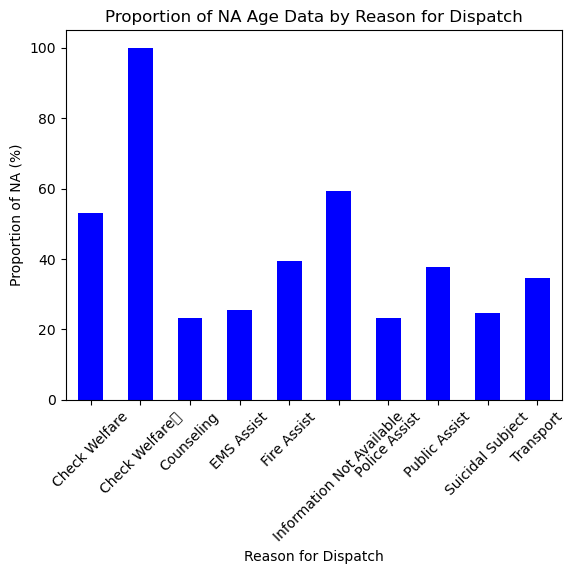

In [135]:
summary_df['Proportion NA'].plot(kind='bar', color='blue')
plt.title('Proportion of NA Age Data by Reason for Dispatch')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Proportion of NA (%)')
plt.xticks(rotation=45)

/Users/miahanson/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


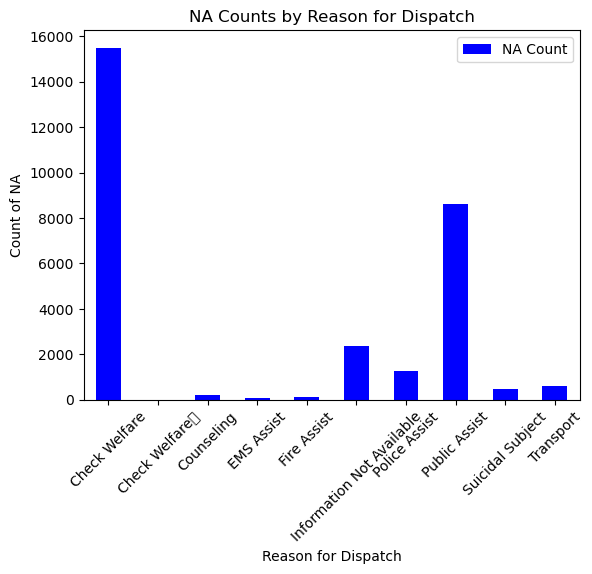

In [137]:
na_counts_df.plot(kind='bar', x='Reason for Dispatch', y='NA Count', color='blue')
plt.title('NA Counts by Reason for Dispatch')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Count of NA')
plt.xticks(rotation=45)
plt.show()

In [8]:

# CAHOOTS_age_all = CAHOOTS_call_data.drop(["Date", "TimeOfCall", "Gender", "Race", "Language", "City", "Reason for Dispatch"], axis=1)
# CAHOOTS_age_all

In [9]:
# # Fill NaN values with "NA"
# CAHOOTS_age_all["Age"].fillna("NA", inplace=True)

# # Replace "Not Given" with "NA"
# CAHOOTS_age_all["Age"].replace("Not Given", "NA", inplace=True)

# # Replace "Unavailable" with "NA"
# CAHOOTS_age_all["Age"].replace("Unavailable", "NA", inplace=True)

# # Plot histogram
# plt.hist(CAHOOTS_age_all["Age"],bins=15, edgecolor='black', align='left')
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.title("Histogram of Ages (including NA)")
# plt.xticks(rotation=90, ha='right')
# plt.show()




# Just Age Dataframe

In [11]:
# dropping the columns I don't need 
    # first dataframe I'm making is just age 
CAHOOTS_age_all = CAHOOTS_call_data.drop(["Date", "TimeOfCall", "Gender", "Race", "Language", "City", "Reason for Dispatch"], axis=1)

# now dropping the values of "Not Given" 
    # https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Method%202%3A%20Using%20the%20drop,value%20we%20want%20to%20remove.
    # # drop all rows that contain 'Coca Cola'
    # df = df.drop(df[df['product_name'] == 'Coca Cola'].index)

# commenting out this line to see what happens when keeping the unknown values
CAHOOTS_age_all_cleaned = CAHOOTS_age_all.drop(CAHOOTS_age_all[CAHOOTS_age_all["Age"].isin(["Not Given", "Unavailable", "nan"])].index)

# checking to make sure the rest of the values are just numbers
CAHOOTS_age_all_cleaned["Age"].unique()

# commenting out this line to see what happens when keeping the unknown values
# also need to get rid of instances of normal python recognized nan values
CAHOOTS_age_all_cleaned = CAHOOTS_age_all_cleaned.dropna()

# checking again to make sure the rest of the values are just numbers
CAHOOTS_age_all_cleaned["Age"].unique()

# finalized cleaned age only dataset including values from 2021, 2022, and 2023
CAHOOTS_age_all_cleaned

,Age
0,46
1,55
3,81
4,51
5,47
...,...
66457,74
66459,47
66460,47
66461,39


In [12]:
CAHOOTS_age_all_cleaned['Age'] = CAHOOTS_age_all_cleaned['Age'].astype(int)


Text(0, 0.5, 'Frequency')

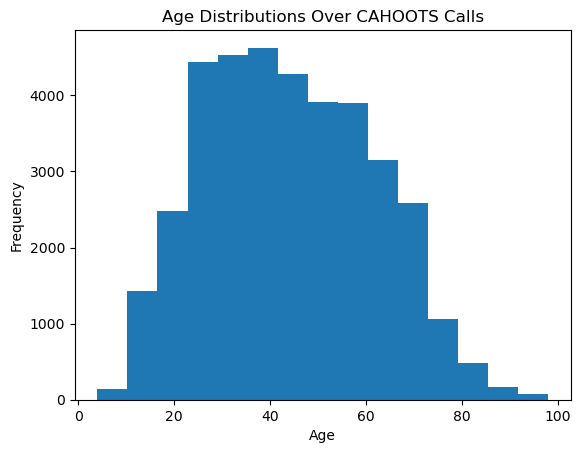

In [13]:
ages = CAHOOTS_age_all_cleaned["Age"]

plt.hist(ages, bins=15 ) 
plt.title('Age Distributions Over CAHOOTS Calls')
plt.xlabel('Age')
plt.ylabel('Frequency') 

# Age and Reason For Dispatch Dataframe

In [15]:
# now making a dataset for age over the call classes

CAHOOTS_dispatch_and_age = CAHOOTS_call_data.drop(["Date", "TimeOfCall", "Gender", "Race", "Language", "City"], axis=1)

In [16]:
CAHOOTS_dispatch_and_age

,Age,Reason for Dispatch
0,46,Public Assist
1,55,Public Assist
2,Unavailable,Public Assist
3,81,Transport
4,51,Check Welfare
...,...,...
67516,NaN,NaN
67517,NaN,NaN
67518,NaN,NaN
67519,NaN,NaN


/Users/miahanson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Reason for Dispatch', ylabel='Count'>

/Users/miahanson/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 11 () missing from current font.
  func(*args, **kwargs)
/Users/miahanson/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


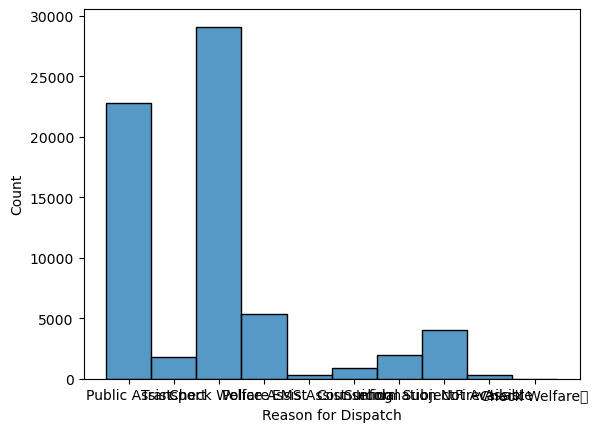

In [17]:
sns.histplot(x=CAHOOTS_dispatch_and_age["Reason for Dispatch"])

In [18]:
# running data through the same age cleaning as above

# now dropping the values of "Not Given" 
    # https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Method%202%3A%20Using%20the%20drop,value%20we%20want%20to%20remove.
    # # drop all rows that contain 'Coca Cola'
    # df = df.drop(df[df['product_name'] == 'Coca Cola'].index)
CAHOOTS_dispatch_and_age_cleaned = CAHOOTS_dispatch_and_age.drop(CAHOOTS_dispatch_and_age[CAHOOTS_dispatch_and_age["Age"].isin(["Not Given", "Unavailable", "nan"])].index)

# checking to make sure the rest of the values are just numbers
CAHOOTS_dispatch_and_age_cleaned["Age"].unique()

# also need to get rid of instances of normal python recognized nan values
CAHOOTS_dispatch_and_age_cleaned = CAHOOTS_dispatch_and_age_cleaned.dropna()

# checking again to make sure the rest of the values are just numbers
    #CAHOOTS_dispatch_and_age_cleaned["Age"].unique()
    
CAHOOTS_dispatch_and_age_cleaned

,Age,Reason for Dispatch
0,46,Public Assist
1,55,Public Assist
3,81,Transport
4,51,Check Welfare
5,47,Check Welfare
...,...,...
66457,74,Public Assist
66459,47,Check Welfare
66460,47,Suicidal Subject
66461,39,Check Welfare


In [19]:
# now cleaning the dispatch portion of data
CAHOOTS_dispatch_cleaned_and_age_cleaned = CAHOOTS_dispatch_and_age_cleaned.drop(
    CAHOOTS_dispatch_and_age_cleaned[CAHOOTS_dispatch_and_age_cleaned["Reason for Dispatch"] == "Information Not Available"].index
)

# making sure the dispatch portion doesn't have any unexpected values
CAHOOTS_dispatch_cleaned_and_age_cleaned["Reason for Dispatch"].unique()

# finalized cleaned cahoots reason for dispatch and age dataframe
CAHOOTS_dispatch_cleaned_and_age_cleaned

,Age,Reason for Dispatch
0,46,Public Assist
1,55,Public Assist
3,81,Transport
4,51,Check Welfare
5,47,Check Welfare
...,...,...
66457,74,Public Assist
66459,47,Check Welfare
66460,47,Suicidal Subject
66461,39,Check Welfare


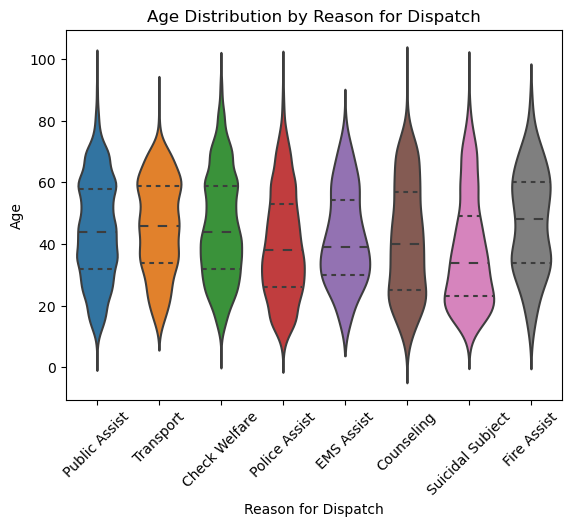

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Age' column to numeric if it's not already
CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'] = pd.to_numeric(CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'])


sns.violinplot(x='Reason for Dispatch', y='Age', data=CAHOOTS_dispatch_cleaned_and_age_cleaned, inner='quartile')
plt.title('Age Distribution by Reason for Dispatch')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()



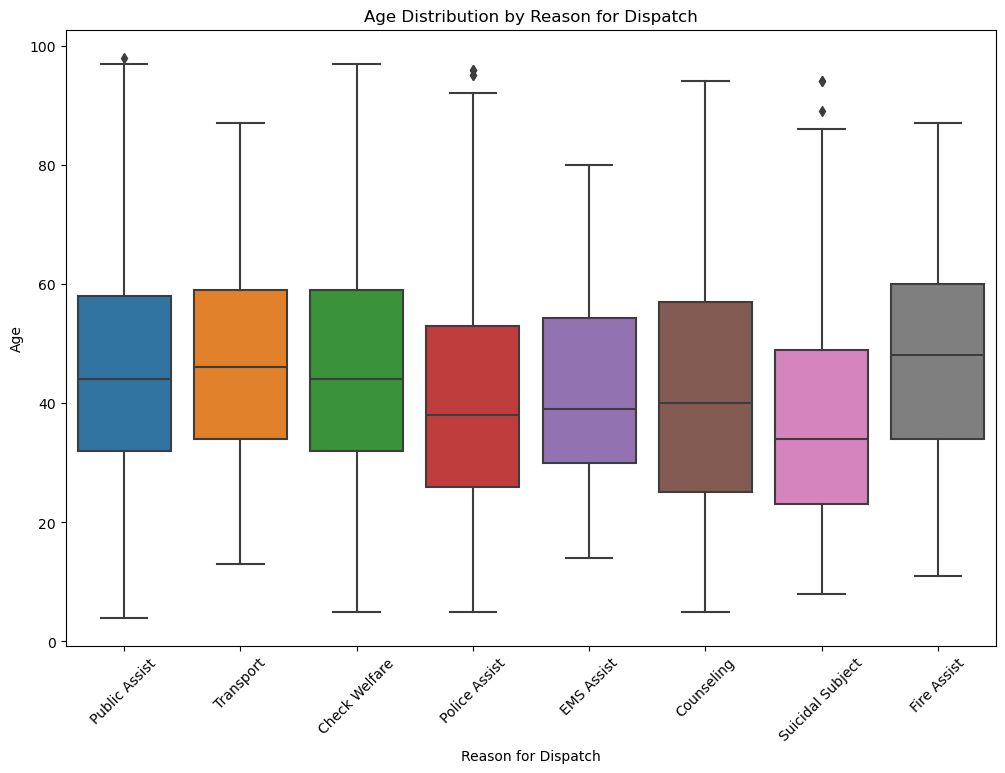

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Age' column to numeric if it's not already
CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'] = pd.to_numeric(CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='Reason for Dispatch', y='Age', data=CAHOOTS_dispatch_cleaned_and_age_cleaned)
plt.title('Age Distribution by Reason for Dispatch')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


/var/folders/48/72hxbzzj791_c7th7nv0p31h0000gn/T/ipykernel_10166/2819495388.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dispatch_age_counts = CAHOOTS_dispatch_cleaned_and_age_cleaned.groupby(['Reason for Dispatch', 'Age Group']).size().reset_index(name='Counts')


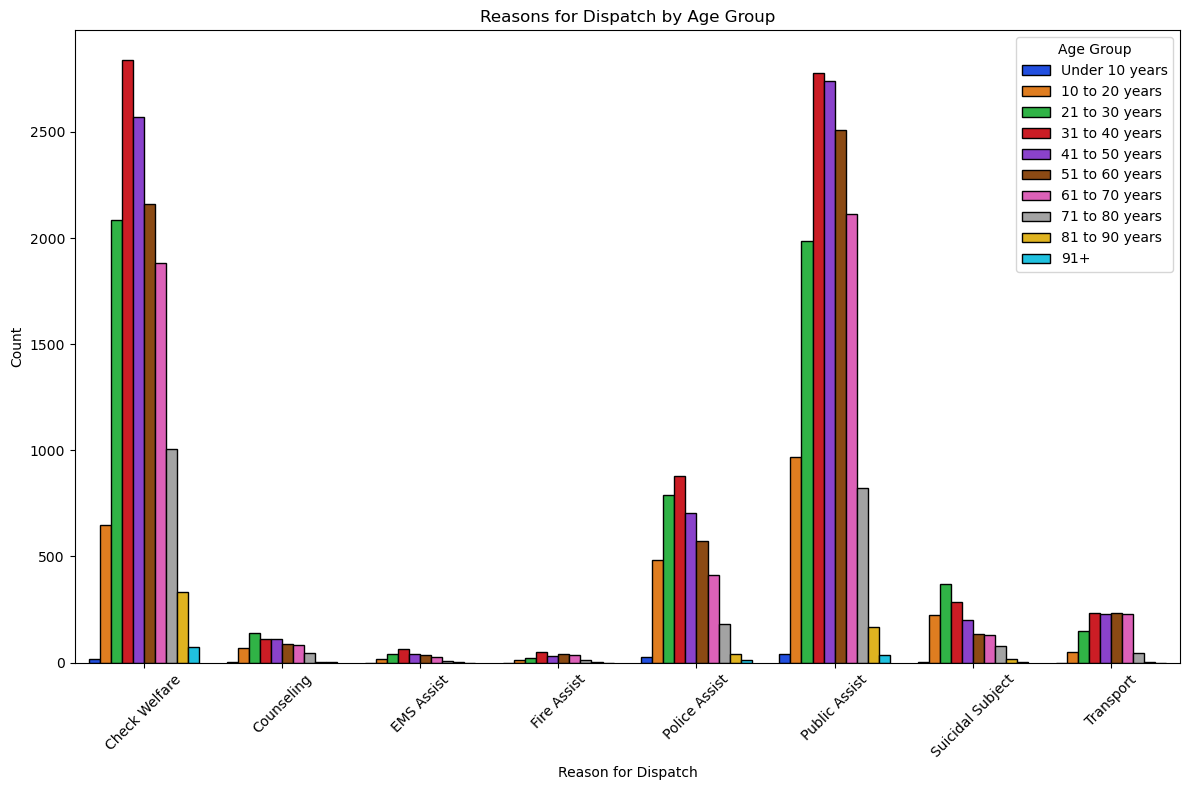

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Age' column to integer type
CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'] = pd.to_numeric(CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['Under 10 years', '10 to 20 years',
                  '21 to 30 years', '31 to 40 years', 
                   '41 to 50 years', '51 to 60 years','61 to 70 years', '71 to 80 years', '81 to 90 years', 
                   '91+']

# Create a new column 'Age Group' based on the custom age groups
CAHOOTS_dispatch_cleaned_and_age_cleaned['Age Group'] = pd.cut(CAHOOTS_dispatch_cleaned_and_age_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

# Group data by 'Reason for Dispatch' and 'Age Group', and count occurrences
dispatch_age_counts = CAHOOTS_dispatch_cleaned_and_age_cleaned.groupby(['Reason for Dispatch', 'Age Group']).size().reset_index(name='Counts')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=dispatch_age_counts, x='Reason for Dispatch', y='Counts', hue='Age Group', edgecolor="black", palette="bright")
plt.title('Reasons for Dispatch by Age Group')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()



# Age and City Dataframe

In [ ]:
# making one more dataframe to include age and city

CAHOOTS_age_and_city = CAHOOTS_call_data.drop(["Date", "TimeOfCall", "Gender", "Race","Language","Reason for Dispatch"], axis=1)

# running data through the same age cleaning as above

# now dropping the values of "Not Given" 
    # https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Method%202%3A%20Using%20the%20drop,value%20we%20want%20to%20remove.
    # # drop all rows that contain 'Coca Cola'
    # df = df.drop(df[df['product_name'] == 'Coca Cola'].index)
CAHOOTS_age_and_city_cleaned = CAHOOTS_age_and_city.drop(CAHOOTS_age_and_city[CAHOOTS_age_and_city["Age"].isin(["Not Given", "Unavailable", "nan"])].index)

# checking to make sure the rest of the values are just numbers
    #CAHOOTS_age_and_city_cleaned["Age"].unique()

# also need to get rid of instances of normal python recognized nan values
CAHOOTS_age_and_city_cleaned = CAHOOTS_age_and_city_cleaned.dropna()

# checking again to make sure the rest of the values are just numbers
    #CAHOOTS_dispatch_and_age_cleaned["Age"].unique()
    
CAHOOTS_age_and_city_cleaned


In [ ]:
# now cleaning for city 
    # df = df.drop(df[df['product_name'] == 'Coca Cola'].index)
CAHOOTS_age_and_city_cleaned = CAHOOTS_age_and_city_cleaned.drop(CAHOOTS_age_and_city_cleaned[CAHOOTS_age_and_city_cleaned["City"] == 'Informatio not recorded'].index)

CAHOOTS_age_and_city_cleaned

In [ ]:
CAHOOTS_age_and_city_cleaned['Age'] = pd.to_numeric(CAHOOTS_age_and_city_cleaned['Age'])


sns.violinplot(x='City', y='Age', data=CAHOOTS_age_and_city_cleaned, inner='quartile')
plt.title('Age Distribution by Reason for Dispatch')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Assuming you already have the data loaded into a DataFrame df

# Group the data by the 'City' column
grouped = CAHOOTS_age_and_city_cleaned.groupby('City')

# Get the DataFrame for Eugene
eugene_df = grouped.get_group('Eugene')

# Get the DataFrame for Springfield
springfield_df = grouped.get_group('Springfield')

In [ ]:
eugene_df

In [ ]:
springfield_df

# Changing Eugene CAHOOTS data into same format as ACS data

In [ ]:
# Getting data into same format as below

# Define age group bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]
# Define age group labels
labels = ['Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
          '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', 
          '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over']

# Add a new column 'Age Group' to the DataFrame based on age bins
eugene_df['Age Group'] = pd.cut(eugene_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Group by 'Age Group' and count occurrences
age_group_totals_eugene = eugene_df.groupby('Age Group').size().reset_index(name='Age Group Totals')

# Reset index
age_group_totals_eugene.reset_index(drop=True, inplace=True)

age_group_totals_eugene

# exporting the eugene CAHOOTS data as a csv file


In [ ]:
# exporting the eugene CAHOOTS data as a csv file
age_group_totals_eugene.to_csv('cahoots_age_eugene.csv', index=False)

In [ ]:
CAHOOTS_eugene_hist = plt.barh(age_group_totals_eugene["Age Group"], age_group_totals_eugene["Age Group Totals"])

In [ ]:
CAHOOTS_eugene_pie = plt.pie(age_group_totals_eugene['Age Group Totals'], labels=age_group_totals_eugene['Age Group'], autopct='%1.1f%%', startangle=140);

# Changing Springfield CAHOOTS data into same format as ACS

In [ ]:
# Define age group bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]
# Define age group labels
labels = ['Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 29 years', 
          '30 to 34 years', '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', '55 to 59 years', 
          '60 to 64 years', '65 to 69 years', '70 to 74 years', '75 to 79 years', '80 to 84 years', '85 years and over']

# Add a new column 'Age Group' to the DataFrame based on age bins
springfield_df['Age Group'] = pd.cut(springfield_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Group by 'Age Group' and count occurrences
age_group_totals_sp = springfield_df.groupby('Age Group').size().reset_index(name='Age Group Totals')

# Reset index
age_group_totals_sp.reset_index(drop=True, inplace=True)

age_group_totals_sp

# exporting the springifield CAHOOTS data as a csv file


In [ ]:
# exporting the springifield CAHOOTS data as a csv file
age_group_totals_sp.to_csv('cahoots_age_springfield.csv', index=False)

In [ ]:
CAHOOTS_springfield_hist = plt.barh(age_group_totals_sp["Age Group"], age_group_totals_sp["Age Group Totals"])

In [ ]:
CAHOOTS_sp_pie = plt.pie(age_group_totals_sp['Age Group Totals'], labels=age_group_totals_sp['Age Group'], autopct='%1.1f%%', startangle=140);



# Visualization of Age Distributions Across Cities

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dropped' is your DataFrame

# Convert 'Age' column to integer type
CAHOOTS_age_and_city_cleaned['Age'] = pd.to_numeric(CAHOOTS_age_and_city_cleaned['Age'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# Define custom age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40','41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create a new column 'Age Group' based on the custom age groups
CAHOOTS_age_and_city_cleaned['Age Group'] = pd.cut(CAHOOTS_age_and_city_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

# Group data by 'Reason for Dispatch' and 'Age Group', and count occurrences
dispatch_age_counts = CAHOOTS_age_and_city_cleaned.groupby(['City', 'Age Group']).size().reset_index(name='Counts')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=dispatch_age_counts, x='City', y='Counts', hue='Age Group')
plt.title('City by Age Group')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


# Importing ACS data

In [ ]:
eugene_acs = pd.read_csv("data/ACS_eugene_5yr.csv")
eugene_acs.head()

In [ ]:
springfield_acs = pd.read_csv("springfield_age_and_sex_data_census.csv")
springfield_acs.head()

# Cleaning Eugene ACS Data

In [ ]:
eugene_acs.head()

In [ ]:
eugene_acs.columns

In [ ]:
# keeping only columns of age breakdown 
eugene_acs = eugene_acs.loc[:, ['Label (Grouping)',"Eugene city, Oregon!!Total!!Estimate"]]


In [ ]:
eugene_acs = eugene_acs.drop(eugene_acs.index[20:42])

In [ ]:
eugene_acs = eugene_acs.rename(columns={"Label (Grouping)": "Age Groups", "Eugene city, Oregon!!Total!!Estimate":"Age Group Totals"})
                                        
                                        
                                     

In [ ]:
# Original data
data = {
    'Age Groups': ['Total population', 'Under 5 years', '5 to 9 years', '10 to 14 years', 
                   '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', 
                   '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', 
                   '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', 
                   '75 to 79 years', '80 to 84 years', '85 years and over'],
    'Age Group Totals': [177930, 6878, 7685, 7316, 14930, 24115, 
                         16338, 11558, 9825, 10579, 8296, 9854, 7098, 
                         9356, 10318, 9423, 6729, 4343, 3289]
}

# Create DataFrame
eugene_acs_cleaned = pd.DataFrame(data)

# Display tidy data
eugene_acs_cleaned

eugene_acs_cleaned = eugene_acs_cleaned.drop(eugene_acs_cleaned.index[0])
eugene_acs_cleaned

# exporting the eugene ACS data as a csv file


In [ ]:
eugene_acs_cleaned.to_csv('acs_5_yr_age_eugene.csv', index=False)

In [ ]:
eugene_acs_hist = plt.barh(eugene_acs_cleaned["Age Groups"], eugene_acs_cleaned["Age Group Totals"])

In [ ]:
CAHOOTS_eugene_hist = plt.barh(age_group_totals_eugene["Age Group"], age_group_totals_eugene["Age Group Totals"])

# Cleaning Springfield ACS Data

In [ ]:
springfield_acs = springfield_acs.loc[:, ['Label (Grouping)',"Springfield city, Oregon!!Total!!Estimate"]]
springfield_acs = springfield_acs.drop(springfield_acs.index[20:42])
springfield_acs = springfield_acs.rename(columns={"Label (Grouping)": "Age Groups", "Springfield city, Oregon!!Total!!Estimate":"Age Group Totals"})


In [ ]:
springfield_acs

In [ ]:
sp_data = {
    'Age Groups': ['Total population', 'Under 5 years', '5 to 9 years', '10 to 14 years', 
                   '15 to 19 years', '20 to 24 years', '25 to 29 years', '30 to 34 years', 
                   '35 to 39 years', '40 to 44 years', '45 to 49 years', '50 to 54 years', 
                   '55 to 59 years', '60 to 64 years', '65 to 69 years', '70 to 74 years', 
                   '75 to 79 years', '80 to 84 years', '85 years and over'],
    'Age Group Totals': [61740, 3455, 3551, 3838, 3685, 4908, 
                         4257, 4749, 4574, 3664, 3925, 3828, 3969, 
                         3645, 3237, 2709, 1580, 943, 1223]
}

# Create DataFrame
springfield_acs_cleaned = pd.DataFrame(sp_data)
springfield_acs_cleaned = springfield_acs_cleaned.drop(springfield_acs_cleaned.index[0])

# Display tidy data
springfield_acs_cleaned

# springfield ACS data to csv

In [ ]:
springfield_acs_cleaned.to_csv('acs_age_sprinfield.csv', index=False)

In [ ]:
springfield_acs_hist = plt.barh(springfield_acs_cleaned["Age Groups"], springfield_acs_cleaned["Age Group Totals"])

In [ ]:
CAHOOTS_springfield_hist = plt.barh(age_group_totals_sp["Age Group"], age_group_totals_sp["Age Group Totals"])

In [ ]:
springfield_age_pie = plt.pie(sp_data['Age Group Totals'][1:], labels=sp_data['Age Groups'][1:], autopct='%1.1f%%', startangle=140);

In [ ]:
# export the cleaned datasets as csvs and then upload to r to run the Jockheree test
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

